# Supplementary Figure 7

## Install and read the R packages

In [ ]:
install.packages("data.table")
install.packages("TDAstats")
install.packages("gridExtra")
library(data.table)
library(TDAstats)
library(tidyverse)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘gri

## Download and read the persistence diagram data in Supplementary Figure 7

In [ ]:
system("wget https://www.dropbox.com/s/zpx9w9wnu3p7n29/persistence_diagram.zip")
system("unzip /content/persistence_diagram.zip")
files <- list.files("/content/persistence_diagram",full.names=TRUE)
files <- files[grep("#144",files)]
file1 <- files[grep("pd1\\.txt",files)]
file2 <- files[grep("pd2\\.txt",files)]

## Supplementary Figure 7

In [ ]:
filename <- c("10%","30%","50%","70%","90%")
filename2 <- c("10_percent","30_percent","50_percent","70_percent","90_percent")
out1 <- paste0("suppl_fig7_",filename,".tsv")
out2 <- paste0("suppl_fig7_",filename,".pdf")
p <- vector("list",length(file1))
for(i in 1:length(file1)){
  cat(i,"/",length(file1),"\n")
  junk <- rbind(cbind(1,as.matrix(fread(file1[i],sep=" ",header=FALSE))),
                        cbind(2,as.matrix(fread(file2[i],sep=" ",header=FALSE))))
  colnames(junk) <- c("dimension","birth","death")
  id <- which(junk[,2]>junk[,3])
  if(length(id)>0) junk <- junk[-id,]
  write.table(junk,out1[i],row.names=FALSE,col.names=TRUE,sep="\t",quote=FALSE)
  p[[i]] <- plot_persist(junk) + ggtitle(filename[i]) +
            theme(plot.title = element_text(hjust = 0.5)) +
            xlim(0,0.03) + ylim(0,0.03)
}


1 / 5 


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



2 / 5 


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



3 / 5 


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



4 / 5 


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



5 / 5 


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



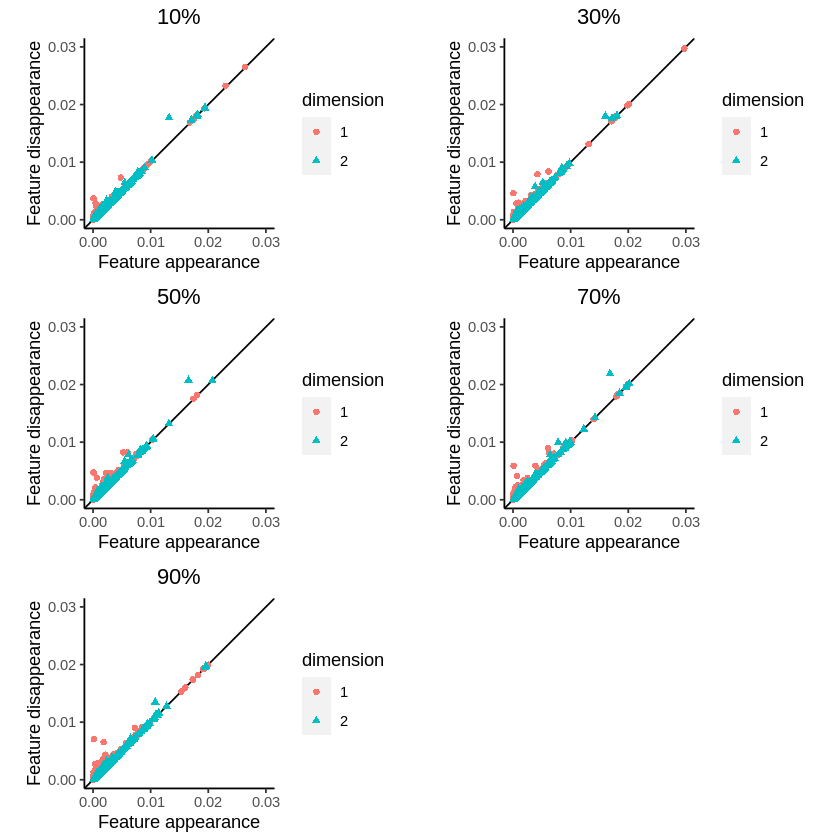

In [ ]:
grid.arrange(p[[1]], p[[2]],
p[[3]], p[[4]], p[[5]], nrow = 3)